In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Car_Purchasing_Data.csv")
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


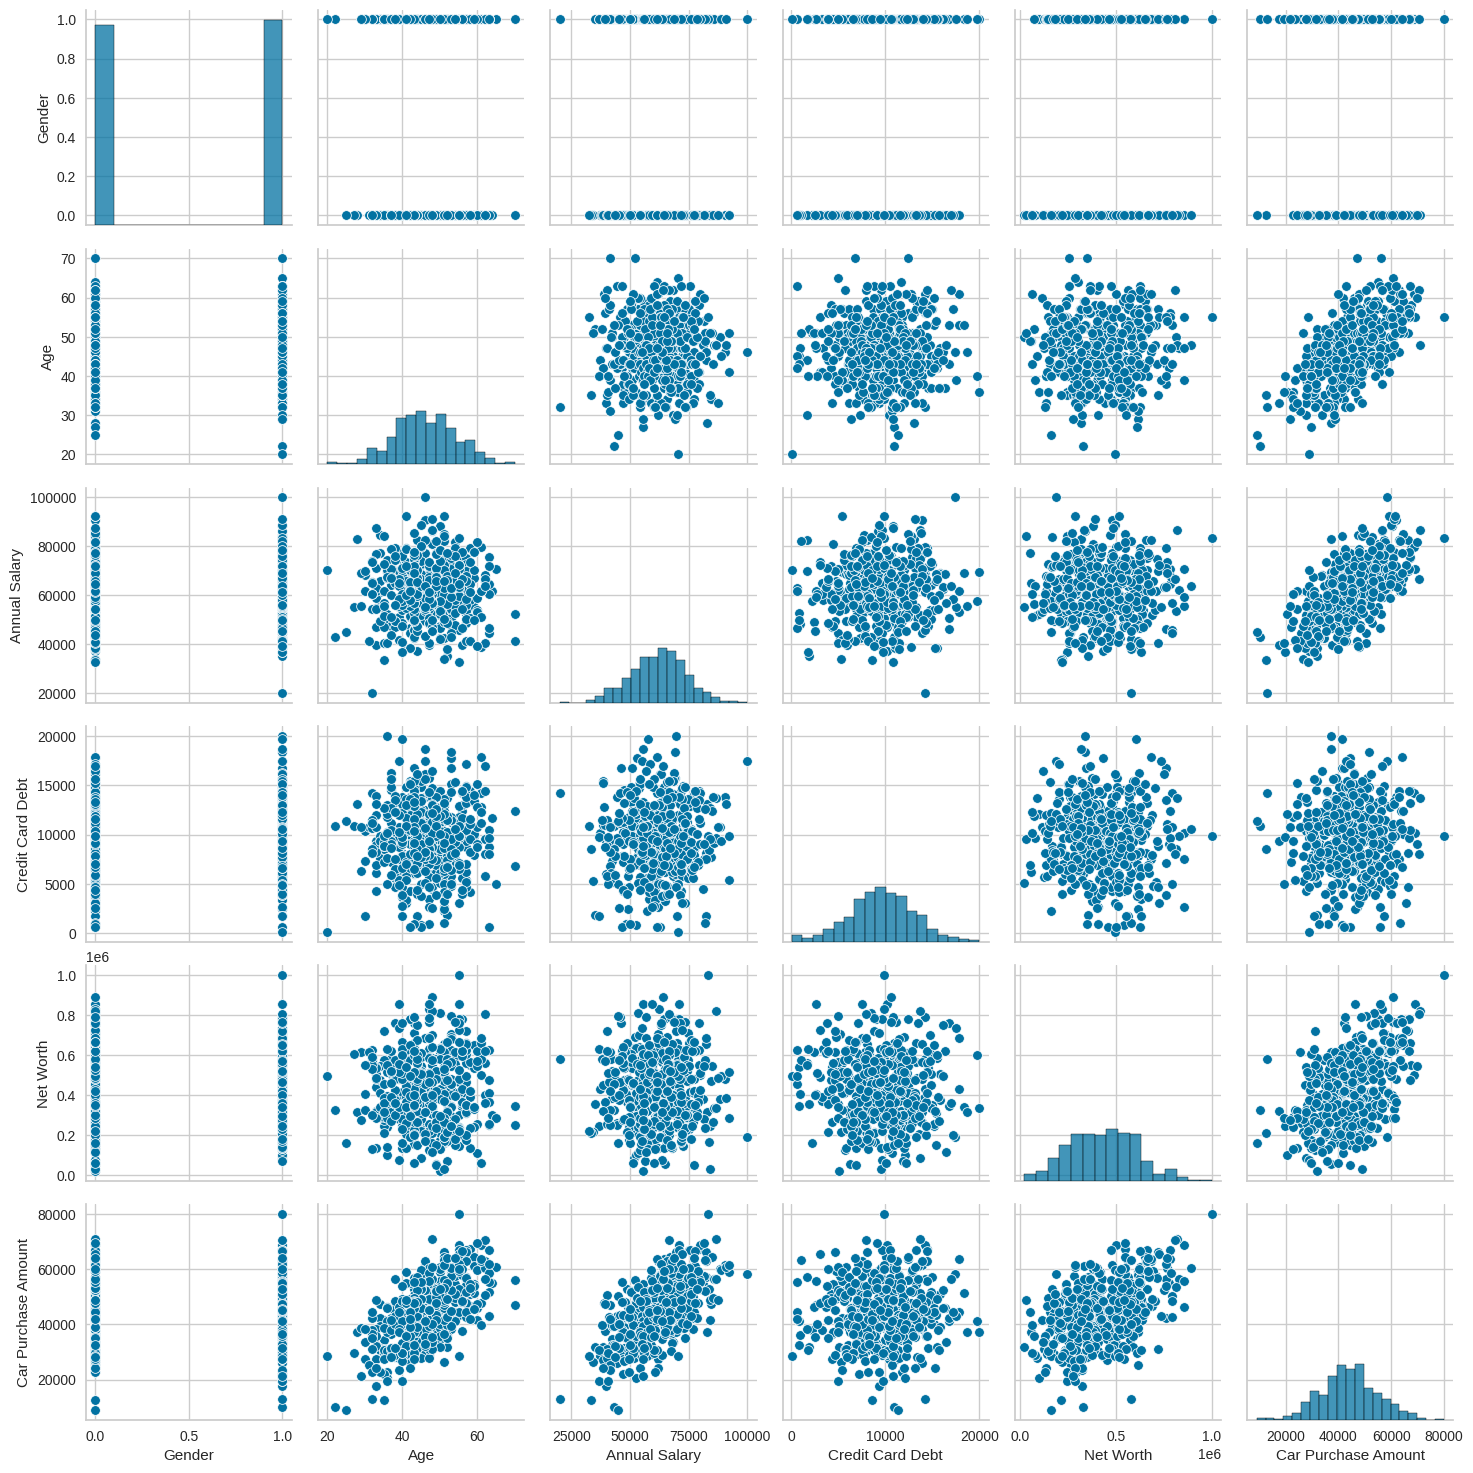

In [ ]:
sns.pairplot(df)

In [204]:
X = df.drop(['Customer Name', 'Customer e-mail', 'Country','Car Purchase Amount'], axis=1)
y = df['Car Purchase Amount']
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

X = X.values
y = y.values.reshape(-1, 1)

In [205]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, tolerance=1e-6, regularization=None, lambda_=0.1, steepest_descent=False):
        self.learning_rate = learning_rate
        self.iterations = np.inf
        self.time_for_fit = np.inf
        self.tolerance = tolerance
        self.regularization = regularization
        self.lambda_ = lambda_
        self.steepest_descent = steepest_descent
        self.theta = None

    def compute_cost(self, X, y, theta):
        m = len(y)
        predictions = X.dot(theta)
        cost = (1 / 2 * m) * np.sum(np.square(predictions - y))
        if self.regularization == "L1":
            cost += self.lambda_ * np.sum(np.abs(theta[1:]))
        elif self.regularization == "L2":
            cost += self.lambda_ * np.sum(np.square(theta[1:]))
        return cost

    def gradient_descent(self, X, y):
        m = len(y)
        self.theta = np.zeros((X.shape[1], 1))
        iterations = 0

        while True:
            prediction = np.dot(X, self.theta)
            gradient = (1 / m) * (X.T.dot(prediction - y))
            if self.regularization == "L1":
                gradient[1:] += (self.lambda_ / m) * np.sign(self.theta[1:])
            elif self.regularization == "L2":
                gradient[1:] += (self.lambda_ / m) * self.theta[1:]

            new_theta = self.theta - self.learning_rate * gradient
            if np.linalg.norm(self.theta - new_theta, ord=2) < self.tolerance:
                break
            self.theta = new_theta
            iterations += 1

        return iterations

    def steepest_gradient_descent(self, X, y):
        m = len(y)
        self.theta = np.random.rand(X.shape[1], 1)
        old_theta = self.theta + 10 * self.tolerance
        iterations = 0

        while np.linalg.norm(self.theta - old_theta, ord=1) > self.tolerance:
            old_theta = self.theta
            prediction = np.dot(X, self.theta)
            gradient = (1 / m) * (X.T.dot((prediction - y)))
            if self.regularization == "L1":
                gradient += self.lambda_ * np.sign(self.theta)
            elif self.regularization == "L2":
                gradient += self.lambda_ * self.theta

            result = minimize(lambda lr: self.compute_cost(X, y, self.theta - lr * gradient), 0.1)
            learning_rate = result.x

            self.theta = self.theta - learning_rate * gradient
            iterations += 1

        return iterations

    def fit(self, X, y):
        start_time = time.time()
        if self.steepest_descent:
            iterations = self.steepest_gradient_descent(X, y)
        else:
            iterations = self.gradient_descent(X, y)
        end_time = time.time()
        self.time_for_fit = end_time - start_time
        self.iterations = iterations

    def predict(self, X):
        return np.dot(X, self.theta)

    def mse(self, y_test, X_test):
        mse_value = np.mean((y_test - self.predict(X_test)) ** 2)
        return float(format(mse_value, f'.{7}f'))

    def mae(self, y_test, X_test):
        mae_value = np.mean(np.abs(y_test - self.predict(X_test)))
        return float(format(mae_value, f'.{7}f'))

In [207]:
standard_model = LinearRegression(steepest_descent=True)
standard_model.fit(train_X, train_y)

data = {
    'Time taken by fit': [standard_model.time_for_fit],
    'Iterations': [standard_model.iterations],
    'Normalized MSE': [standard_model.mse(test_y, test_X)/df['Car Purchase Amount'].mean()],
    'Normalized MAE': [standard_model.mae(test_y, test_X)/df['Car Purchase Amount'].mean()]
}

In [208]:
L1_model = LinearRegression(steepest_descent=True, regularization="L1")
L1_model.fit(train_X, train_y)

data['Time taken by fit'].append(L1_model.time_for_fit)
data['Iterations'].append(L1_model.iterations)
data['Normalized MSE'].append(L1_model.mse(test_y, test_X)/df['Car Purchase Amount'].mean())
data['Normalized MAE'].append(L1_model.mae(test_y, test_X)/df['Car Purchase Amount'].mean())

In [209]:
L2_model = LinearRegression(steepest_descent=True, regularization="L2")
L2_model.fit(train_X, train_y)

data['Time taken by fit'].append(L2_model.time_for_fit)
data['Iterations'].append(L2_model.iterations)
data['Normalized MSE'].append(L2_model.mse(test_y, test_X)/df['Car Purchase Amount'].mean())
data['Normalized MAE'].append(L2_model.mae(test_y, test_X)/df['Car Purchase Amount'].mean())

In [210]:
results = pd.DataFrame(data, index=["Standard model", "L1 model", "L2 model"])
results

,Time taken by fit,Iterations,Normalized MSE,Normalized MAE
Standard model,0.016550,10,1.211044e-08,4.456998e-07
L1 model,0.131408,12,6.422603e-07,3.088030e-06
L2 model,0.038455,5,1.655515e-07,1.535483e-06


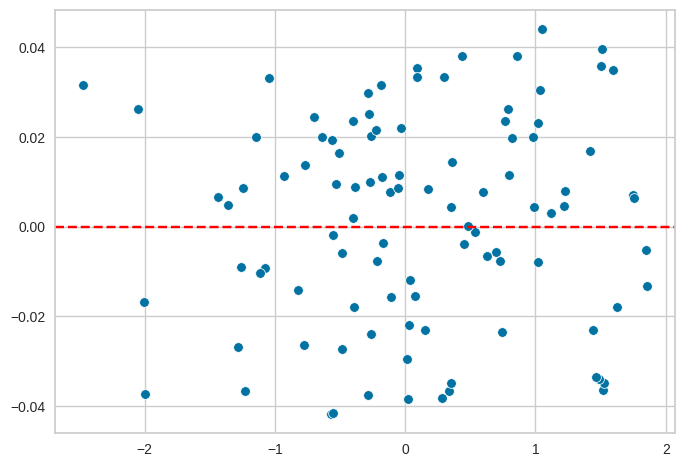

In [211]:
predictions = standard_model.predict(test_X)
residuals = test_y.flatten() - predictions.flatten()
sns.scatterplot(x=test_y.flatten(), y=residuals)
plt.axhline(y=0, linestyle='--', color='red')

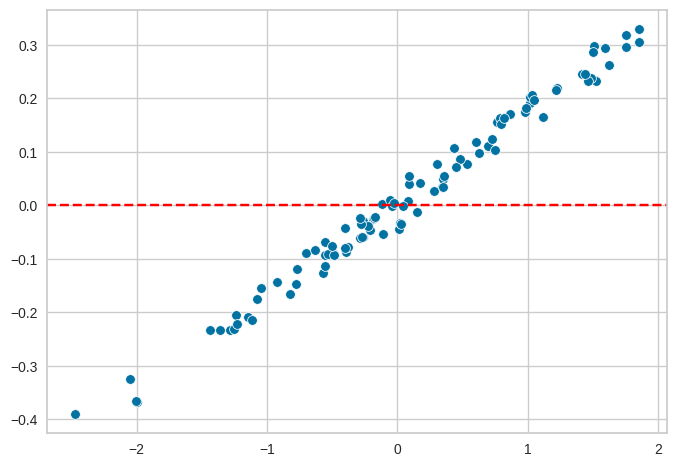

In [224]:
predictions = L1_model.predict(test_X)
residuals = test_y.flatten() - predictions.flatten()
sns.scatterplot(x=test_y.flatten(), y=residuals)
plt.axhline(y=0, linestyle='--', color='red')

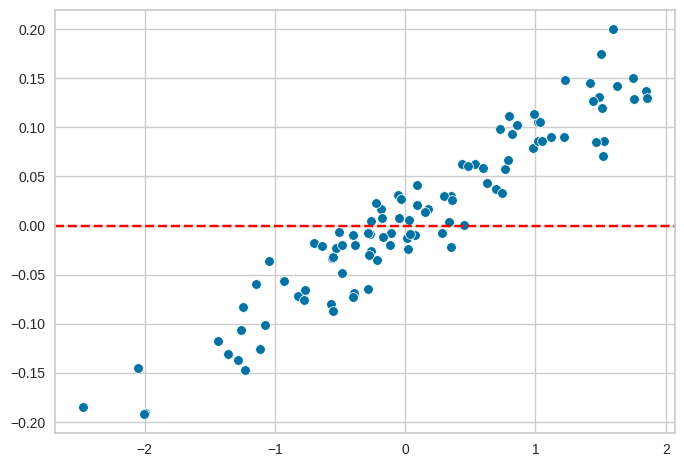

In [222]:
predictions = L2_model.predict(test_X)
residuals = test_y.flatten() - predictions.flatten()
sns.scatterplot(x=test_y.flatten(), y=residuals)
plt.axhline(y=0, linestyle='--', color='red')

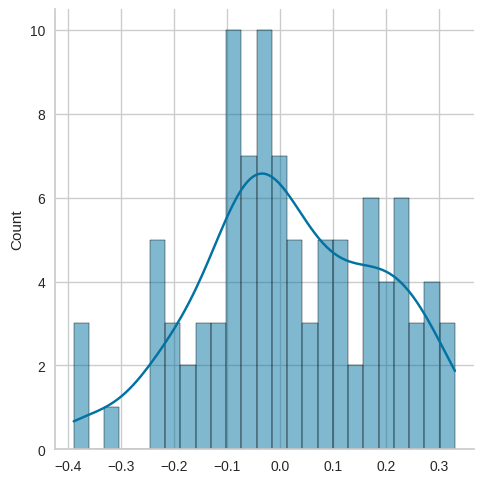

In [225]:
sns.displot(residuals, bins=25, kde=25)

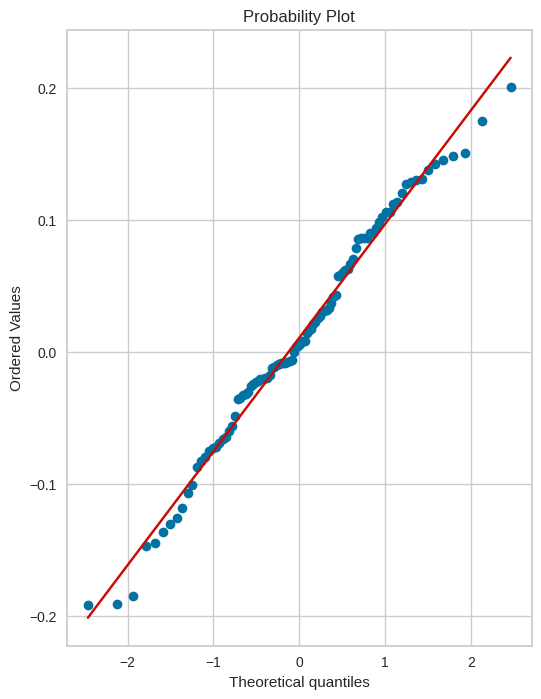

In [223]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(residuals,plot=ax)

In [ ]:
x_train , x_test , y_train , y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
LR_model= LinearRegression()
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ("MEAN ABSOLUTE ERROR = " , mean_absolute_error(y_test,y_pred))
print("MEAN AQUARRED ERROR = " , mean_squared_error(y_test,y_pred))


MEAN ABSOLUTE ERROR =  0.01996928004730678
MEAN AQUARRED ERROR =  0.000528662363963599
